## The current working directory

In [544]:
pwd

'C:\\Users\\Owner\\Assignment 3'

## Imports

In [545]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces
# tells matplotlib to embed plots within the notebook
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

## Loading data 

In [546]:
data = pd.read_csv("house_data_complete.csv")
training_data = pd.read_csv("house_prices_data_training_data.csv")
data = data.drop('date',1)

## Dividing the data into training, cross-validation and testing

In [547]:
X = data.values[:,2:]
y = data.values[:,1]
X_train, X_testCV, y_train, y_testCV = train_test_split(X, y, test_size=0.4)
X_test, X_CV, y_test, y_CV = train_test_split(X_train, y_train, test_size=0.5)

## Visualization of the data

In [548]:
def plotData(x, y):
    fig = pyplot.figure()  # open a new figure
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Price')
    pyplot.xlabel('Area of living in square feet')

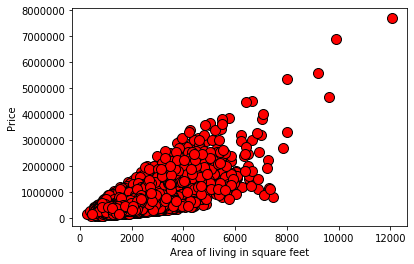

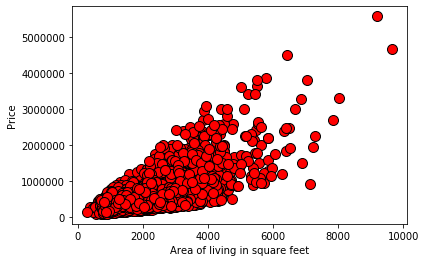

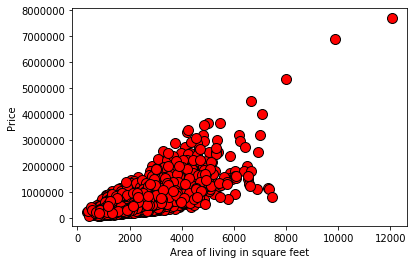

In [549]:
plotData(X_train[:,2],y_train)
plotData(X_CV[:,2],y_CV)
plotData(X_test[:,2],y_test)

## Normalization

In [550]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
    
    for i in range(X.shape[1]):
        mu[i] = np.mean(X_norm[:,i])
        sigma[i] = np.std(X_norm[:,i])
        X_norm[:,i] = (X_norm[:,i]-mu[i])/sigma[i]
    
    return X_norm, mu, sigma

In [551]:
X_train_norm, mu, sigma = featureNormalize(X_train)
X_CV_norm, mu, sigma = featureNormalize(X_CV)
X_test_norm, mu, sigma = featureNormalize(X_test)

In [552]:
m_train = y_train.size
m_CV = y_CV.size
m_test = y_test.size
# Add intercept term to X_train, X_CV and X_test
X_train = np.concatenate([np.ones((m_train, 1)), X_train_norm], axis=1)
X_CV = np.concatenate([np.ones((m_CV, 1)), X_CV_norm], axis=1)
X_test = np.concatenate([np.ones((m_test, 1)), X_test_norm], axis=1)

## Cost function

In [553]:
def computeCostMulti(X, y, theta, lambda_):
    m = y.shape[0]  # number of training examples
    hypothesis = np.dot(theta,X.transpose())
    J = ((np.sum(np.square(hypothesis-y)))/(2*m))+(lambda_/(2*m))*(np.sum(np.square(theta[1:])))
    return J

## Gradient Descent

In [554]:
def gradientDescentMulti(X, y, theta, alpha, num_iters, lambda_):
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # make a copy of theta, which will be updated by gradient descent
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        # ======================= YOUR CODE HERE ==========================
        hypothesis = np.dot(theta,X.transpose())
        theta = theta*(1-(alpha*lambda_)/m) - (alpha/m)*(np.dot(hypothesis-y,X))
        # =================================================================
        
        # save the cost J in every iteration
        J_history.append(computeCostMulti(X, y, theta, lambda_))
    
    fig = pyplot.figure()
    pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
    
    pyplot.xlabel('Number of iterations')
    pyplot.ylabel('Cost J')
    
    
    print('Cost function of lambda = ', lambda_)
    print(J_history[-1])
    
    return theta, J_history

## Training using the linear hypothesis

Cost function of lambda =  0
21047529128.22863
Cost function of lambda =  100
21241790849.06008
Cost function of lambda =  20
21085323743.225273
[array([542161.95411428, -36970.53039321,  37972.70293307,  85047.76623676,
         4459.33068329,   -707.59824253,  50114.84917803,  40901.59000397,
        18360.37327708, 108974.70388646,  80131.92946184,  26445.77569717,
       -76245.7217518 ,   8887.7114933 , -28190.92861591,  85099.95203504,
       -30336.77654092,  11650.55937824,  -9780.04595967]), array([ 5.38012861e+05, -3.60164449e+04,  3.76513199e+04,  8.42943672e+04,
        4.43257685e+03, -3.27565867e+02,  4.98351333e+04,  4.09029600e+04,
        1.85544588e+04,  1.07515164e+05,  7.92608059e+04,  2.65120555e+04,
       -7.48225308e+04,  9.22344577e+03, -2.73414318e+04,  8.45768339e+04,
       -3.01485011e+04,  1.32270386e+04, -9.54759895e+03]), array([541327.02387002, -36776.97160221,  37906.59410518,  84894.53683399,
         4454.19524484,   -629.70885243,  50058.58277699,  

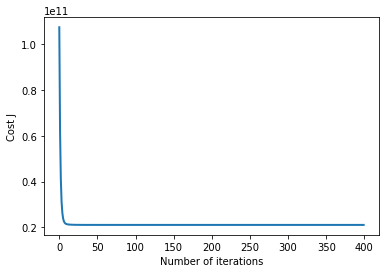

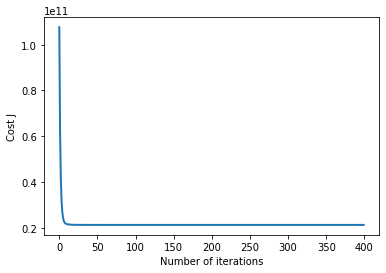

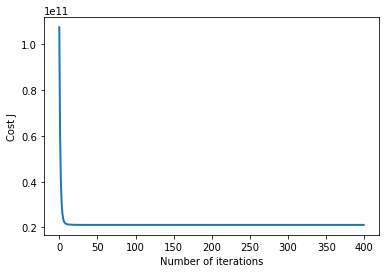

In [555]:
lambdas_ = [0, 100, 20]
thetas = []
for lambda_ in lambdas_:
    alpha = 0.3
    num_iters = 400
    theta = np.zeros(X_train.shape[1])
    theta, J_history = gradientDescentMulti(X_train, y_train, theta, alpha, num_iters, lambda_)
    thetas.append(theta)
print(thetas)

# Cross validation using linear hypothesis

In [556]:
All_J = []
for theta in thetas:
    hypothesis = np.dot(theta,X_CV.transpose())
    J = (1/2*m_CV)*np.sum(np.square(hypothesis-y_CV))
    All_J.append(J)
index_of_least_J = All_J.index(min(All_J))
print(All_J)

[8.60494129833061e+17, 8.607115158957806e+17, 8.604665881155412e+17]


## Testing using the linear hypothesis

In [557]:
theta = thetas[index_of_least_J]
hypothesis = np.dot(theta,X_test.transpose())
J = (1/2*m_test)*np.sum(np.square(hypothesis-y_test))
print(J)

9.093827885659684e+17


## Training using quadratic hypothesis


Cost function of lambda =  0
41087164988.46943
Cost function of lambda =  100
41171533426.88308
Cost function of lambda =  20
41104055604.759
[array([ 1.02121184e+05,  1.37503952e+02,  1.32132886e+04, -5.39427182e+03,
        9.81894151e+01,  5.01631295e+04,  2.83607848e+03,  1.94195388e+04,
        3.01864814e+04,  3.92952851e+04,  4.79095860e+04,  4.21014279e+04,
        6.21877128e+04,  7.50115949e+03,  3.47375686e+04,  3.31870845e+03,
        9.96686813e+03,  3.27711440e+04, -5.14927008e+02]), array([ 1.01788439e+05,  1.41391761e+02,  1.32549688e+04, -5.27027411e+03,
        9.82368474e+01,  5.01063216e+04,  2.83654553e+03,  1.94299862e+04,
        3.02051984e+04,  3.92682896e+04,  4.78144600e+04,  4.20390780e+04,
        6.20820119e+04,  7.51576231e+03,  3.47206752e+04,  3.41409157e+03,
        1.00272524e+04,  3.27746515e+04, -5.14558128e+02]), array([ 1.02054484e+05,  1.38282240e+02,  1.32216441e+04, -5.36941829e+03,
        9.81987672e+01,  5.01517575e+04,  2.83617135e+03,  1.9

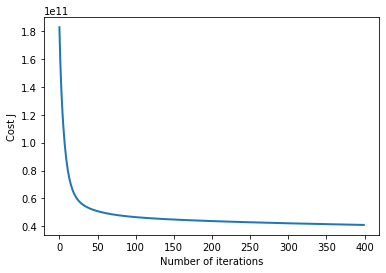

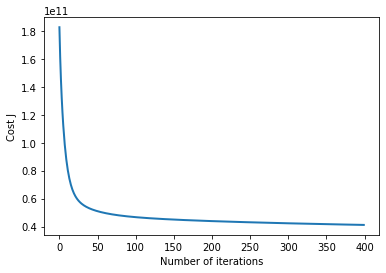

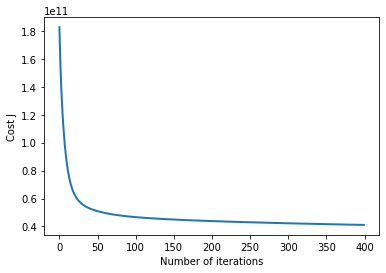

In [558]:
lambdas_ = [0, 100, 20]
thetas = []
for lambda_ in lambdas_:
    alpha = 0.003
    num_iters = 400
    theta = np.zeros(X_train.shape[1])
    theta, J_history = gradientDescentMulti(np.power(X_train,2), y_train, theta, alpha, num_iters, lambda_)
    thetas.append(theta)
print(thetas)

## Cross validation using quadratic hypothesis

In [559]:
All_J = []
for theta in thetas:
    hypothesis = np.dot(theta,np.power(X_CV,2).transpose())
    J = (1/2*m_CV)*np.sum(np.square(hypothesis-y_CV))
    All_J.append(J)
index_of_least_J = All_J.index(min(All_J))
print(All_J)

[1.7427965117894403e+18, 1.7437828073021724e+18, 1.7429936657481439e+18]


## Testing using quadratic hypothesis

In [560]:
theta = thetas[index_of_least_J]
hypothesis = np.dot(theta,np.power(X_test,2).transpose())
J = (1/2*m_test)*np.sum(np.square(hypothesis-y_test))
print(J)

1.7152647946144166e+18


## Training using cubic hypothesis

Cost function of lambda =  0
157583071959.25098
Cost function of lambda =  100
157583581619.36182
Cost function of lambda =  20
157583173891.96344
[array([ 999.43129505,   26.10713054, 1936.43271312, 4041.74530327,
         19.68850366,  793.24922074,  699.45791852, 3984.89926035,
       1258.08973664, 2539.04131506, 3621.90183771, 2454.95206238,
       -463.78564524, 3790.7899233 ,  267.99308037,  -64.55279868,
        684.90521608, 2641.36078723,   42.19592688]), array([ 999.42372044,   26.10714881, 1936.42076229, 4041.72121424,
         19.68851337,  793.24325129,  699.46071419, 3984.87214589,
       1258.08020149, 2539.02344826, 3621.87840578, 2454.93679332,
       -463.7821887 , 3790.7663531 ,  267.99105283,  -64.55231923,
        684.90014488, 2641.34210277,   42.19625557]), array([ 999.42978012,   26.10713419, 1936.43032294, 4041.74048545,
         19.6885056 ,  793.24802684,  699.45847766, 3984.89383744,
       1258.08782961, 2539.03774169, 3621.8971513 , 2454.94900856,
       

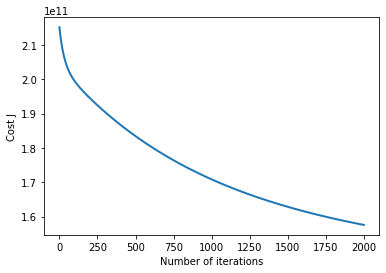

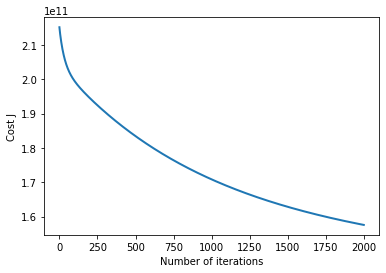

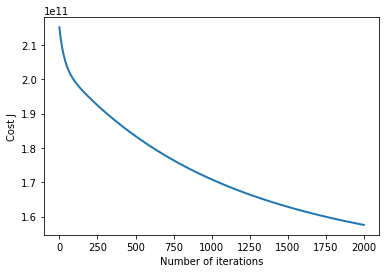

In [561]:
lambdas_ = [0, 100, 20]
thetas = []
for lambda_ in lambdas_:
    alpha = 0.000001
    num_iters = 2000
    theta = np.zeros(X_train.shape[1])
    theta, J_history = gradientDescentMulti(np.power(X_train,3), y_train, theta, alpha, num_iters, lambda_)
    thetas.append(theta)
print(thetas)

## Cross validation using cubic function

In [562]:
All_J = []
for theta in thetas:
    hypothesis = np.dot(theta,np.power(X_CV,3).transpose())
    J = (1/2*m_CV)*np.sum(np.square(hypothesis-y_CV))
    All_J.append(J)
index_of_least_J = All_J.index(min(All_J))
print(All_J)

[6.597766580214846e+18, 6.59777383071006e+18, 6.597768030314558e+18]


## Testing using the cubic hypothesis

In [563]:
theta = thetas[index_of_least_J]
hypothesis = np.dot(theta,np.power(X_test,2).transpose())
J = (1/2*m_test)*np.sum(np.square(hypothesis-y_test))
print(J)

8.095035646523733e+18


## 3 fold using all hypotheses

hypothesis:  1 fold:  1
Cost function of lambda =  0
18847397464.989017
Cost function of lambda =  100
19012028469.082767
Cost function of lambda =  20
18879464341.56427
[array([538682.19857023, -30173.44340225,  29227.87781357,  79150.61595482,
         3668.85752963,   4809.94918233,  48566.16885812,  40131.66363951,
        17452.47238696, 111834.9921461 ,  73813.93753933,  25539.842864  ,
       -74831.02895358,   8785.58758073, -29538.13497509,  85493.83080319,
       -29104.10305332,  12845.45264894,  -8374.60934616]), array([534969.19747725, -29445.49546071,  29150.4098753 ,  78572.23787394,
         3671.33893802,   5011.17482716,  48338.65464714,  40110.91348131,
        17605.20261842, 110370.97415736,  73160.38934812,  25565.45286118,
       -73566.54763498,   9063.02148635, -28742.15239529,  85010.51592853,
       -28953.50235525,  14204.15650399,  -8219.92024115]), array([537935.48080121, -30026.10274655,  29211.78795687,  79033.27725222,
         3669.72186281,   4851.179

Cost function of lambda =  0
155477847773.81607
Cost function of lambda =  100
155478314366.0385


C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Cost function of lambda =  20
155477941092.86414
[array([ 996.97924383,   26.6393112 , 1651.86904249, 3734.83427847,
         23.15388184,  813.41228978,  619.9490369 , 4175.59802727,
       1235.22625049, 2556.7656504 , 3329.68515041, 2471.17453115,
       -468.41400332, 3738.89792619,  266.5322977 ,  -63.32810703,
        680.79079286, 2637.55117924,   29.78242544]), array([ 996.97244113,   26.63932622, 1651.85894711, 3734.81152978,
         23.15389799,  813.40676836,  619.9515403 , 4175.57232837,
       1235.21782121, 2556.74917297, 3329.66398726, 2471.15971982,
       -468.41085562, 3738.87691362,  266.53049714,  -63.32768084,
        680.7862451 , 2637.53408851,   29.78264621]), array([ 996.97788329,   26.63931421, 1651.86702341, 3734.82972872,
         23.15388507,  813.41118549,  619.94953758, 4175.59288747,
       1235.22456463, 2556.7623549 , 3329.68091776, 2471.17156887,
       -468.41337378, 3738.89372366,  266.53193759,  -63.32802179,
        680.78988331, 2637.54776108,  

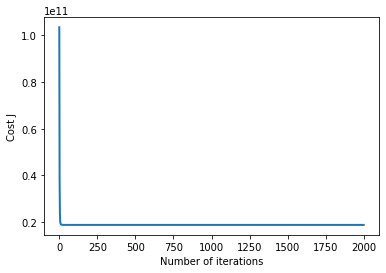

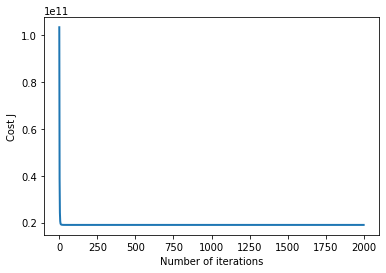

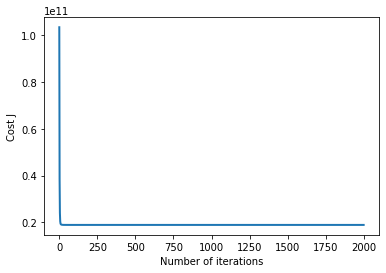

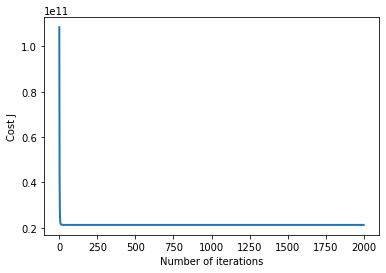

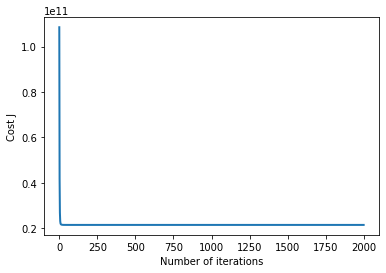

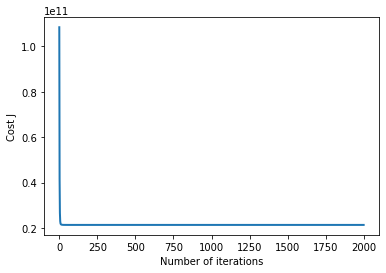

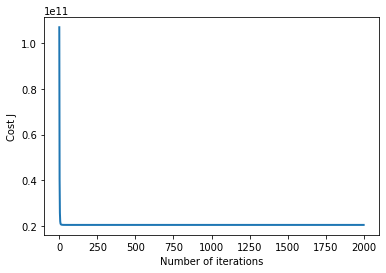

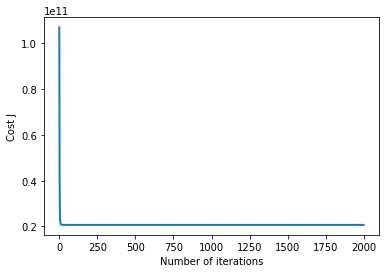

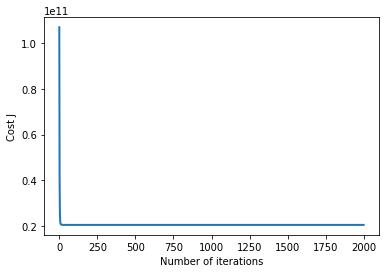

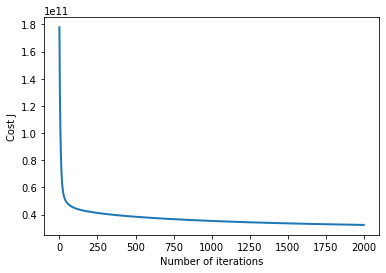

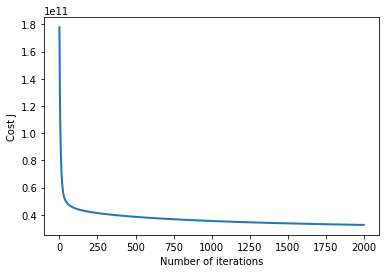

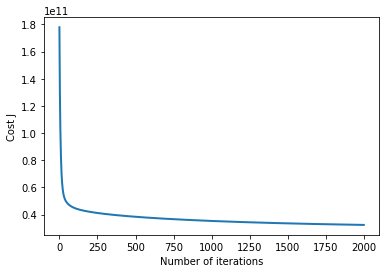

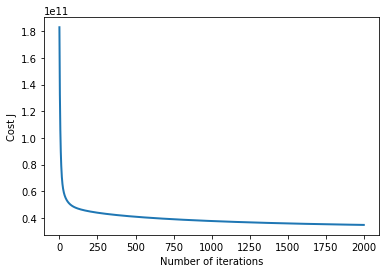

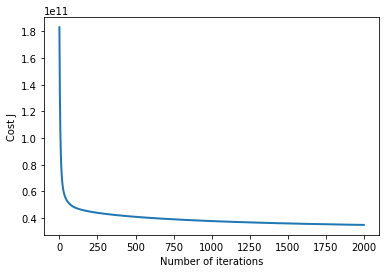

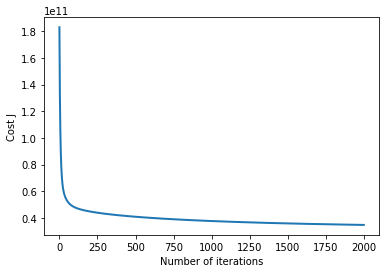

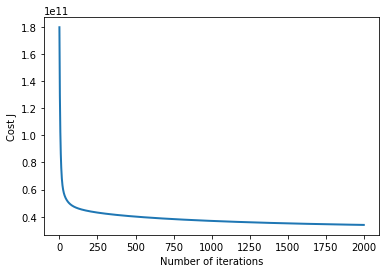

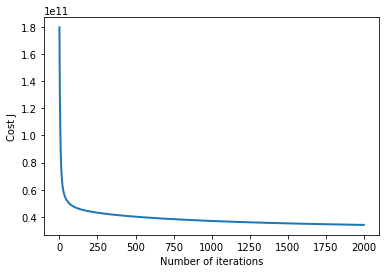

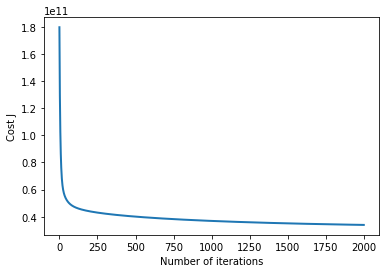

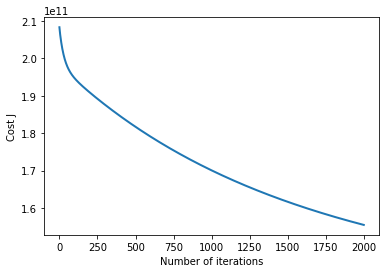

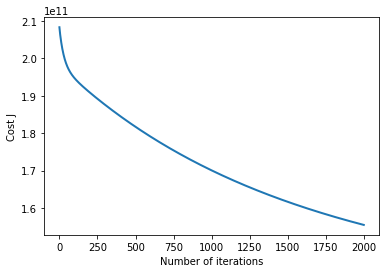

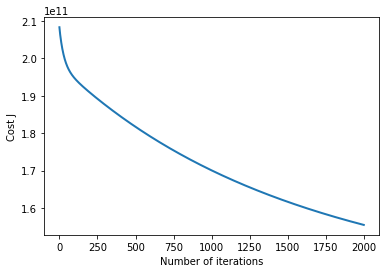

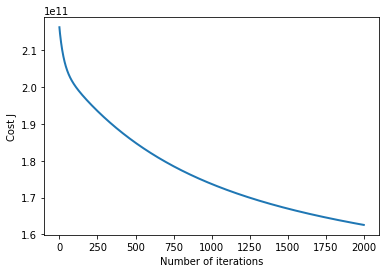

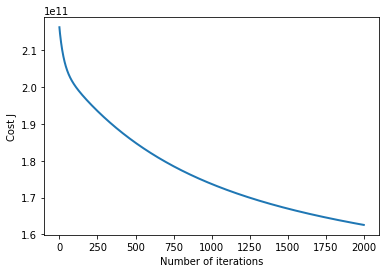

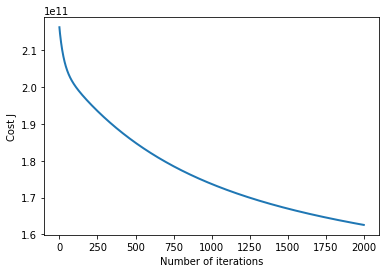

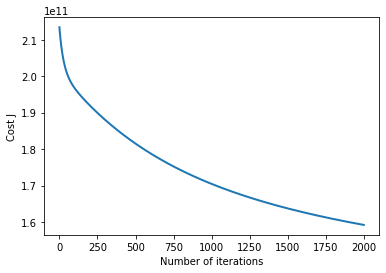

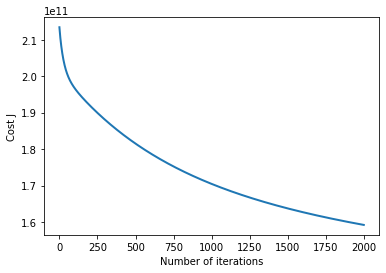

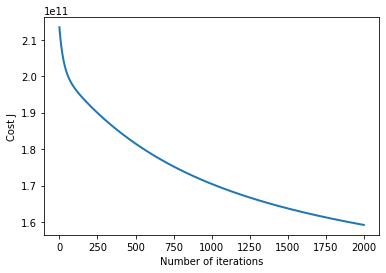

In [564]:
data = data.values
kfold = KFold(3, True, 1)
alphas = [0.3, 0.003, 0.000001]
hypothesis_number = [1, 2, 3]
for alpha in alphas:
#     i = 0
    fold_counter = 0
    for train, test in kfold.split(data):
        fold_counter = fold_counter+1
        X_train = data[train][:,2:]
        y_train = data[train][:,1]
        X_test, X_CV, y_test, y_CV = train_test_split(data[test][:,2:], data[test][:,1], test_size = 0.5)
        print('hypothesis: ', hypothesis_number[alphas.index(alpha)], 'fold: ', fold_counter) 
        # normalization
        
        X_train_norm, mu, sigma = featureNormalize(X_train)
        X_CV_norm, mu, sigma = featureNormalize(X_CV)
        X_test_norm, mu, sigma = featureNormalize(X_test)
        
        m_train = y_train.size
        m_CV = y_CV.size
        m_test = y_test.size
        
        # Add intercept term to X_train, X_CV and X_test
        X_train = np.concatenate([np.ones((m_train, 1)), X_train_norm], axis=1)
        X_CV = np.concatenate([np.ones((m_CV, 1)), X_CV_norm], axis=1)
        X_test = np.concatenate([np.ones((m_test, 1)), X_test_norm], axis=1)
        
        # training
        
        lambdas_ = [0, 100, 20]
        thetas = []
        for lambda_ in lambdas_:
            alpha = alphas[alphas.index(alpha)]
            num_iters = 2000
            theta = np.zeros(X_train.shape[1])
            theta, J_history = gradientDescentMulti(np.power(X_train,hypothesis_number[alphas.index(alpha)]), y_train, theta, alpha, num_iters, lambda_)
            thetas.append(theta)
        print(thetas)
        
        # CV
        
        All_J = []
        for theta in thetas:
            hypothesis = np.dot(theta,np.power(X_CV,hypothesis_number[alphas.index(alpha)]).transpose())
            J = (1/2*m_CV)*np.sum(np.square(hypothesis-y_CV))
            All_J.append(J)
            index_of_least_J = All_J.index(min(All_J))
        print('Cost function using cross validation: ', All_J)
        
        # testing
        
        theta = thetas[index_of_least_J]
        hypothesis = np.dot(theta,np.power(X_test,hypothesis_number[alphas.index(alpha)]).transpose())
        J = (1/2*m_test)*np.sum(np.square(hypothesis-y_test))
        print('The least error', J)
        
        
        #i = i+1